# Distribution for authors with at least 28 publications
#### (so  4607 authors, the 1.98% of the total data)
#### -> fitting Power law, Power law with exponential cut off and exponential 

In [13]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit # The module that contains the curve_fit routine

import warnings
warnings.filterwarnings("ignore")

# Import own libraries 
import os, sys
script_path = os.path.realpath(os.path.dirname("10_on_trajectories"))
os.chdir(script_path)
sys.path.append("..")

from myLibraries.queries import * 
from myLibraries.rawData_queries import *
from myLibraries.events import *
from myLibraries.theoretical_functions import *
from myLibraries.utils import *

In [14]:
HOLE_SIZE = 28
ACTIVITY = 0
MIN_PUBS = 28

In [15]:
df = get_all_collabs()

df = df[df["2018"] != 0]
df = df[df["max_hole_size"] <= HOLE_SIZE]
df = df[df["activity"] >= ACTIVITY]
df = df[df["tot_pubs"] >= MIN_PUBS]

colls = df["2018"].values

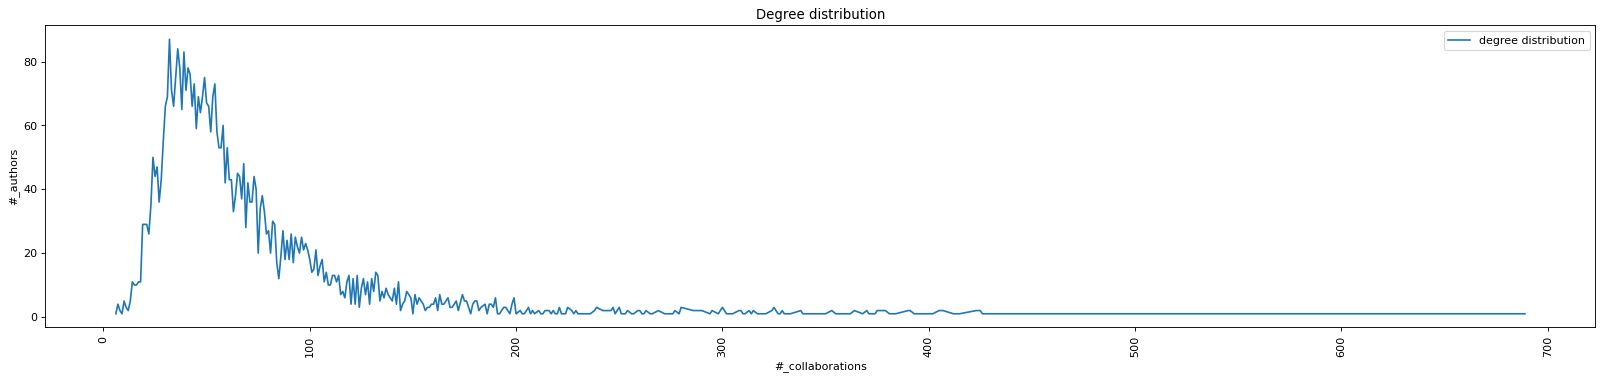

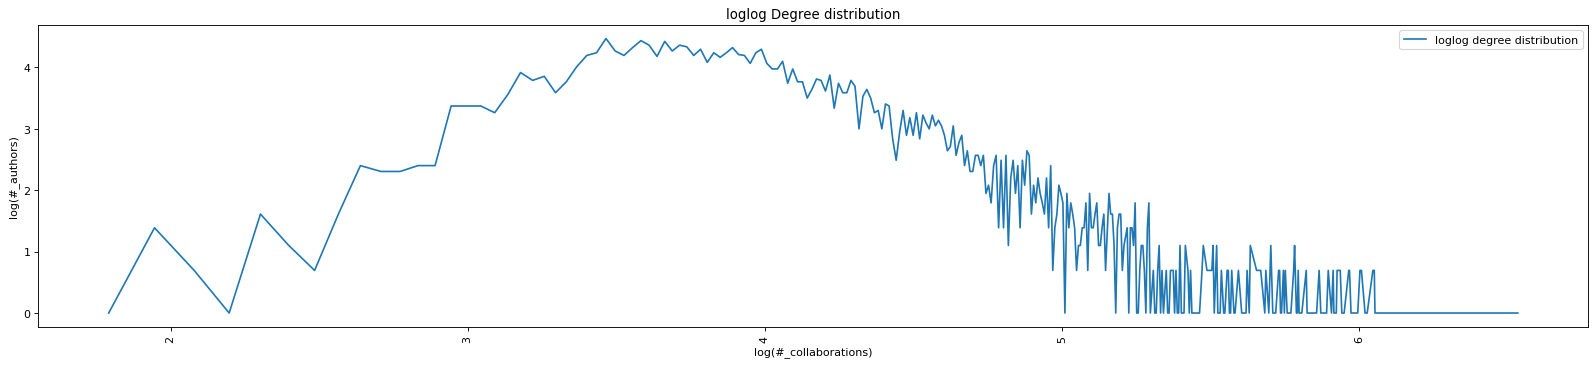

In [16]:
# DD

unique, counts = np.unique(colls, return_counts=True)
x, y = unique, counts  

draw("Degree distribution", "#_collaborations", "#_authors", x, [y], ["degree distribution"], 25, 5)
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", np.log(x), [np.log(y)], ["loglog degree distribution"], 25, 5)

# computing M_k with k>=18 to avoid the starting pike 

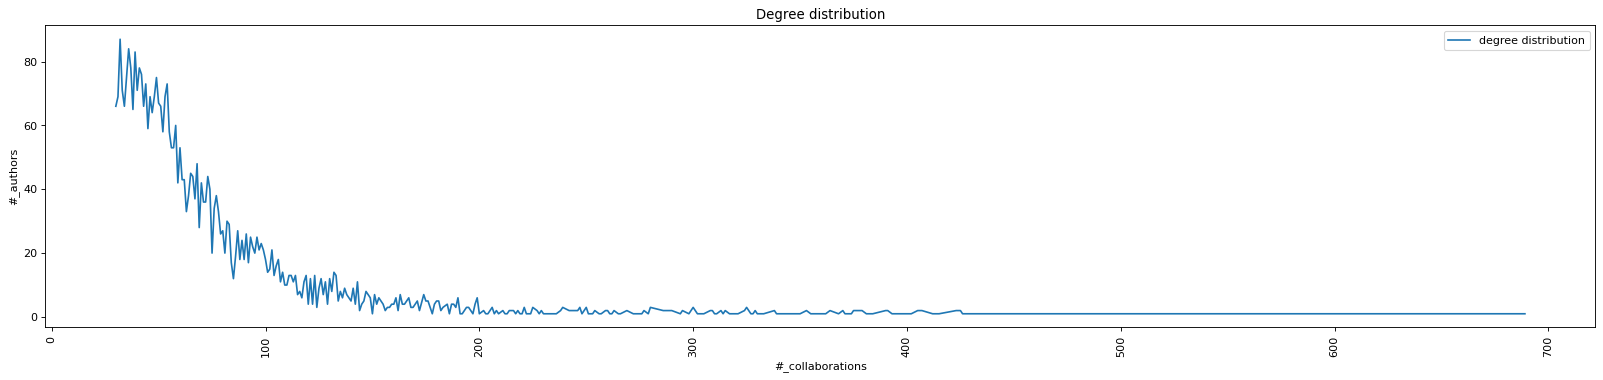

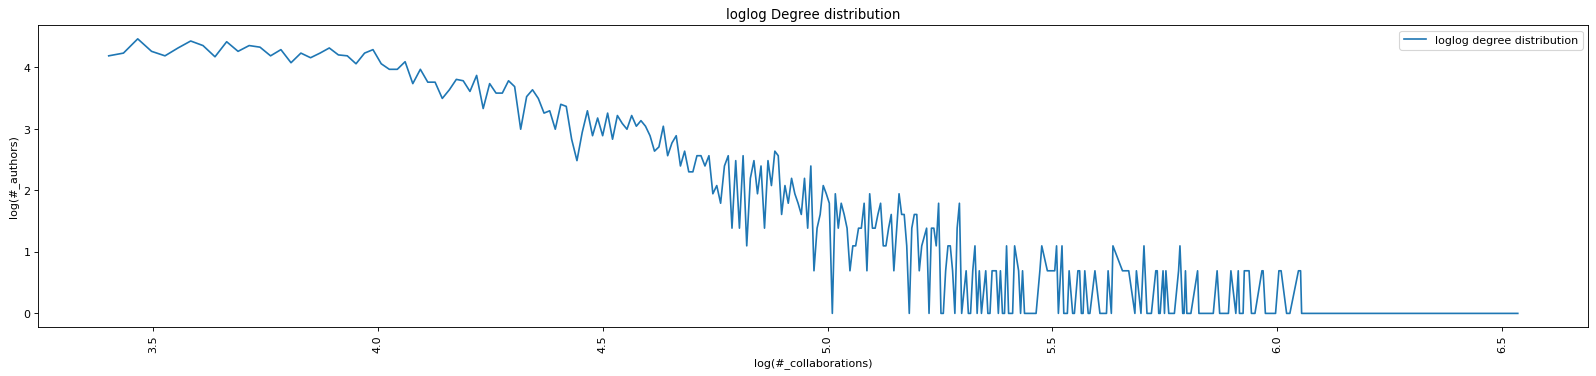

In [17]:
# DD
unique, counts = np.unique(colls, return_counts=True)
x, y = unique[24:], counts[24:]  


draw("Degree distribution", "#_collaborations", "#_authors", x, [y], ["degree distribution"], 25, 5)
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", np.log(x), [np.log(y)], ["loglog degree distribution"], 25, 5)

# Powerlaw fitting

In [18]:
# powerlaw 
def powerlaw(x,c, gamma):
    y = []
    for i in range(len(x)):
        y.append(c*pow(x[i], - gamma))
   
    return y

def fit_powerlaw(xdata, ydata):
    popt, pcov = curve_fit(powerlaw, xdata, ydata)
    c = popt[0]
    gamma = popt[1]

    print('Power law fit with parameters -> c:', c, ', exp:', gamma)
    
    return powerlaw(xdata, c, gamma), c, gamma

# powerlaw_exp_cutoff 
def powerlaw_exp_cutoff(x,c, gamma, sigma):
    y = []
    for i in range(len(x)):
        y.append(c*pow(x[i], - gamma) * pow(sigma, x[i]))
    return y

def fit_powerlaw_exp_cutoff(xdata, ydata):
    popt, pcov = curve_fit(powerlaw_exp_cutoff, xdata, ydata, bounds=(0, [np.inf, np.inf, 1]))
    c = popt[0]
    gamma = popt[1]
    sigma = popt[2]

    print('Power law with exponential cutoff fit with parameters -> c:', c, ', exp:', gamma, ', cutoff:', sigma)
    
    return powerlaw_exp_cutoff(xdata, c, gamma, sigma), c, gamma, sigma

Power law fit with parameters -> c: 14753.467919631705 , exp: 1.4549090511406229
Power law with exponential cutoff fit with parameters -> c: 1.0 , exp: 1.0 , cutoff: 0.5


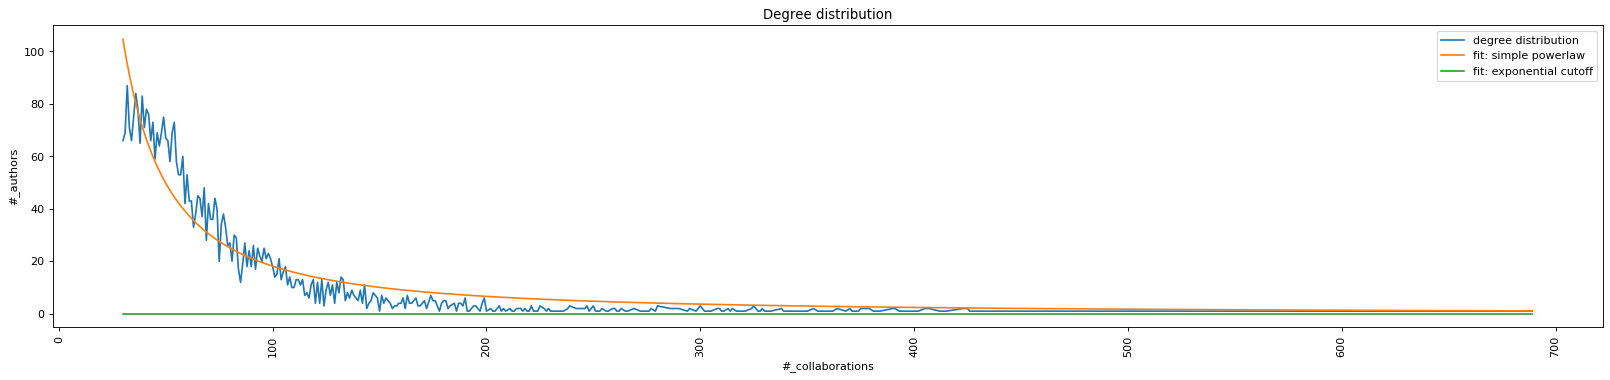

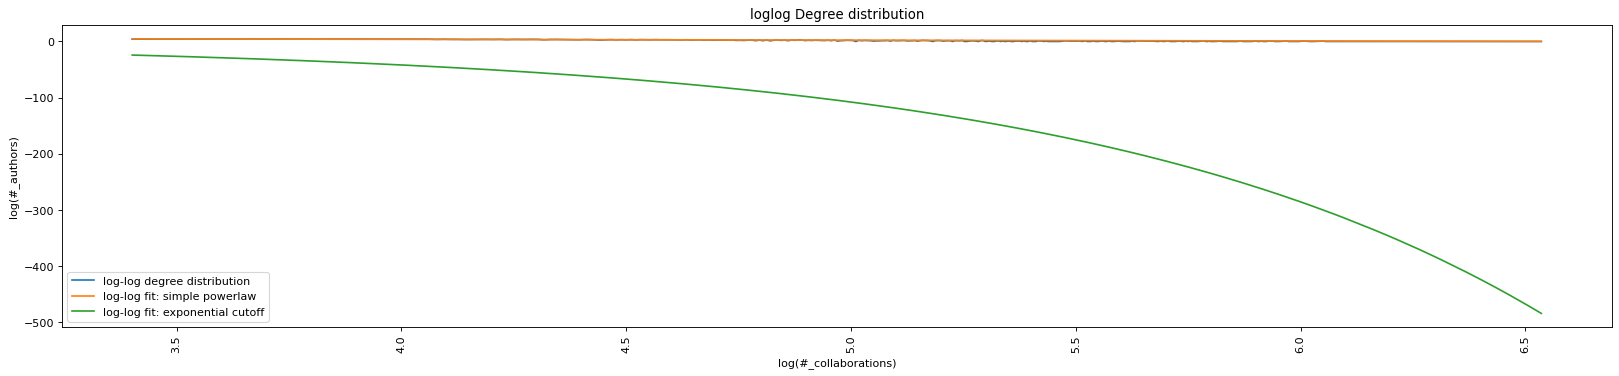

In [19]:
# fitting with power law and power law with exponential cutoff 
my_powerlaw_Fit = fit_powerlaw(x, y)[0]
my_powerlaw_cutoff_Fit = fit_powerlaw_exp_cutoff(x, y)[0]

draw("Degree distribution",  "#_collaborations", "#_authors", x, [y, my_powerlaw_Fit, my_powerlaw_cutoff_Fit], ["degree distribution", "fit: simple powerlaw", "fit: exponential cutoff"], 25, 5)
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", np.log(x), [np.log(y), np.log(my_powerlaw_Fit), np.log(my_powerlaw_cutoff_Fit) ], ["log-log degree distribution", "log-log fit: simple powerlaw", "log-log fit: exponential cutoff"], 25, 5)

## The normal powerlaw seems to fit, the cutoff one instead no, here are plotted one by one to check the mindividually

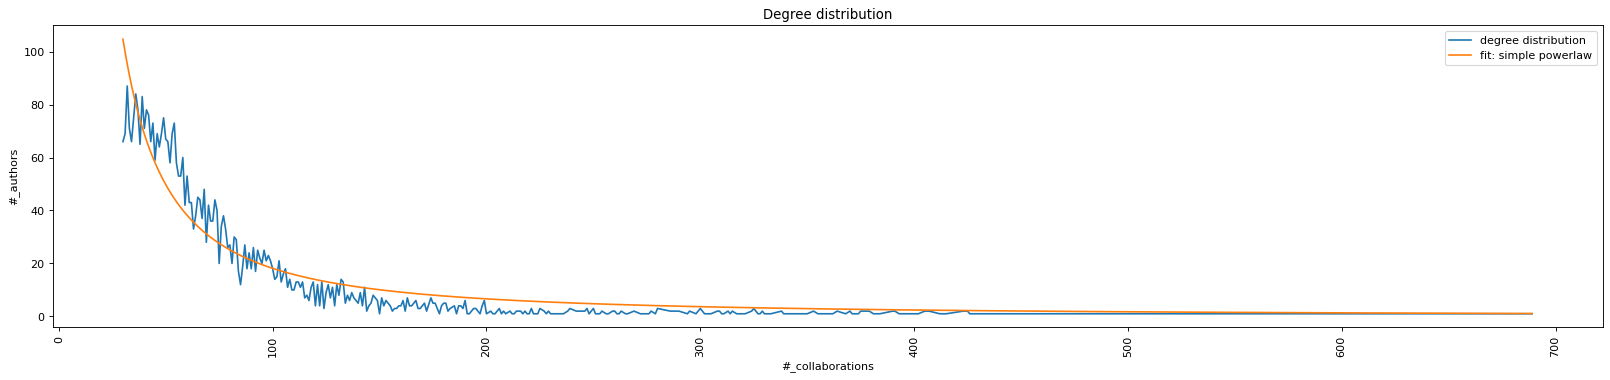

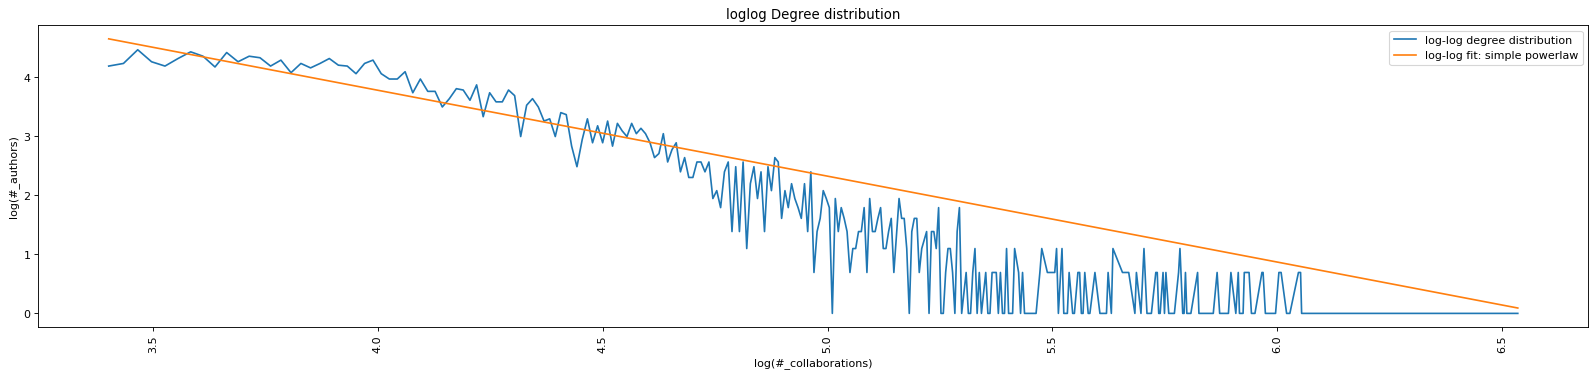

In [30]:
draw("Degree distribution",  "#_collaborations", "#_authors", x, [y, my_powerlaw_Fit], ["degree distribution", "fit: simple powerlaw"], 25, 5)
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", np.log(x), [np.log(y), np.log(my_powerlaw_Fit)], ["log-log degree distribution", "log-log fit: simple powerlaw"], 25, 5)

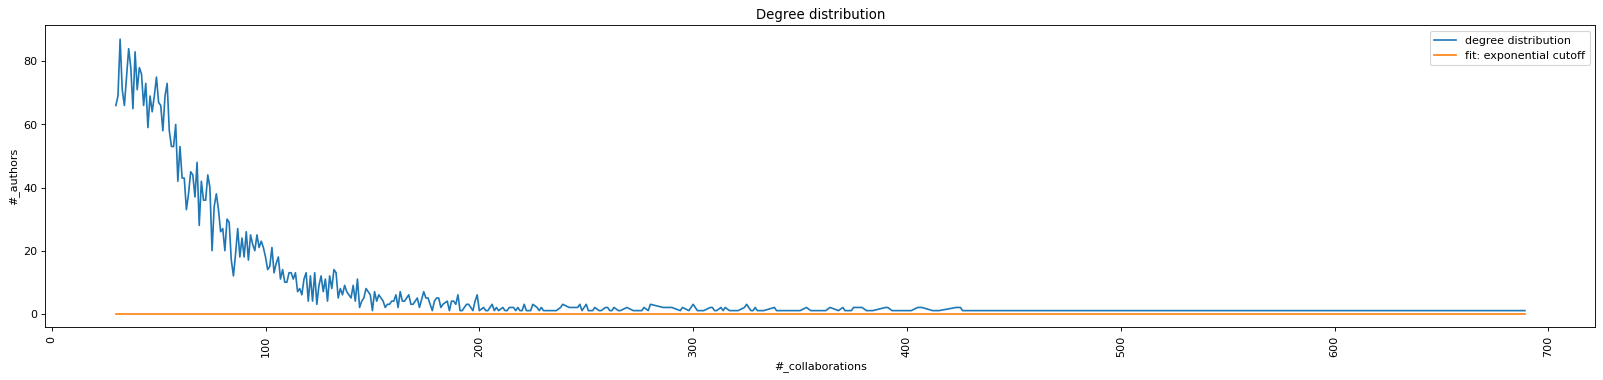

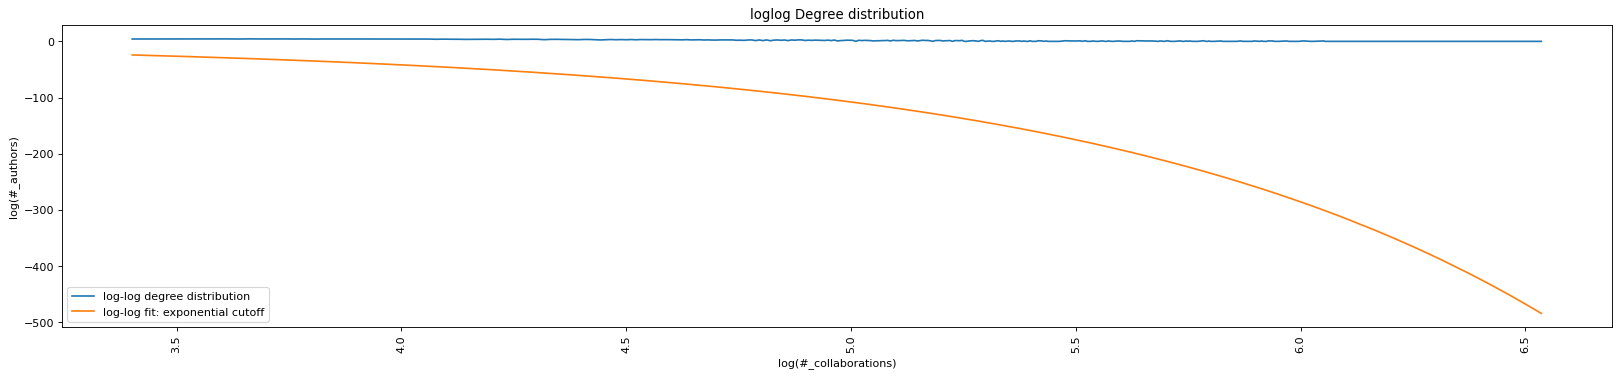

In [31]:

draw("Degree distribution",  "#_collaborations", "#_authors", x, [y,  my_powerlaw_cutoff_Fit], ["degree distribution", "fit: exponential cutoff"], 25, 5)
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", np.log(x), [np.log(y), np.log(my_powerlaw_cutoff_Fit) ], ["log-log degree distribution", "log-log fit: exponential cutoff"], 25, 5)

# Exponential Fit

exponential fit with parameters -> exponent: -1.4549100952812888 c: 14753.527717928338


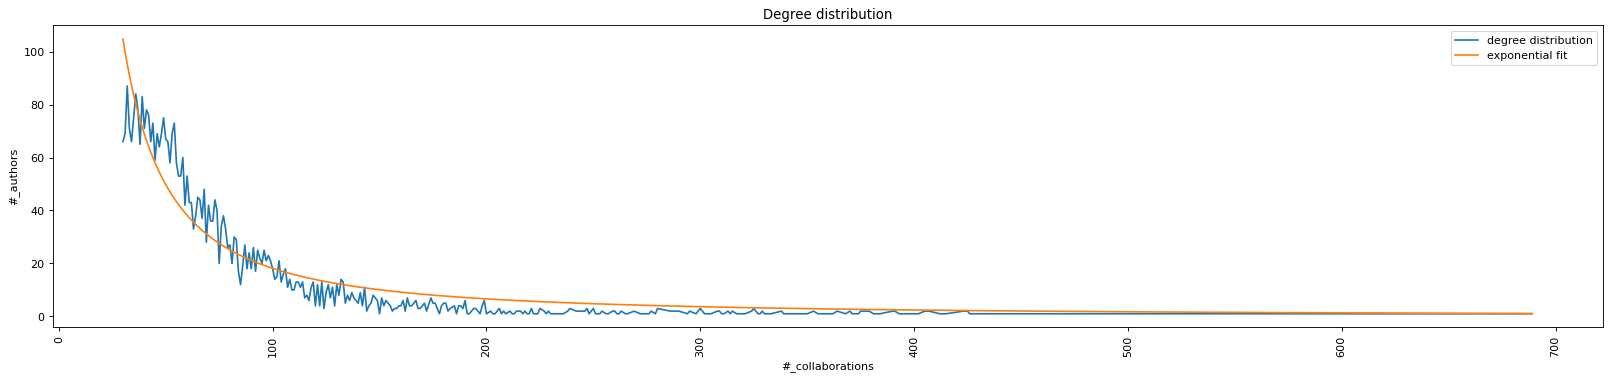

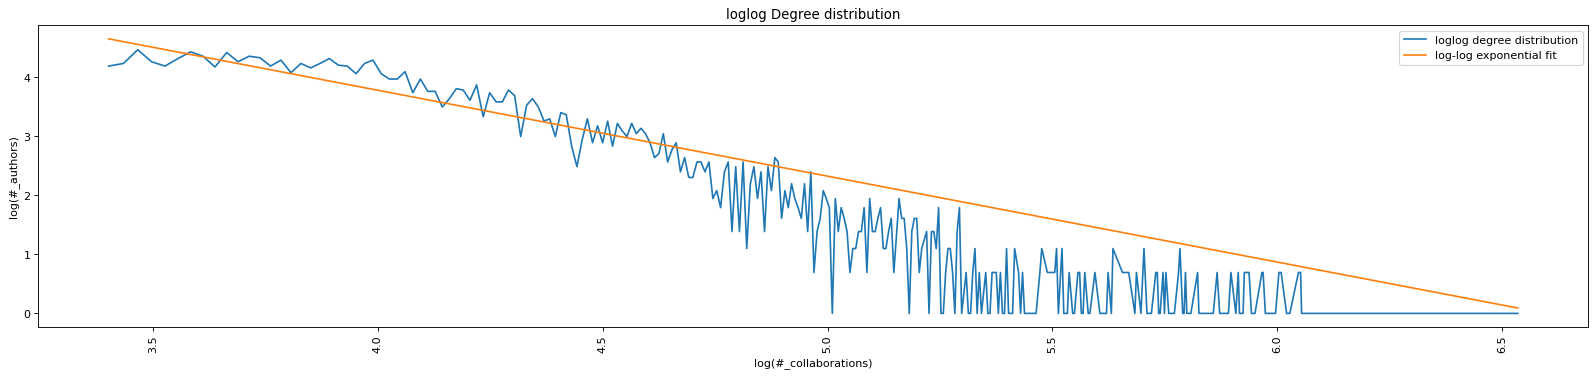

In [24]:
# exponential 
def exponential(x, c, exp):
    y = []
    for i in range(len(x)):
        y.append(c*pow(x[i], exp))
    return y

def fit_exponential(xdata, ydata):
    popt, pcov = curve_fit(exponential, xdata, ydata)
    c = popt[0]
    exp = popt[1]

    print('exponential fit with parameters -> exponent:', exp, 'c:', c)
    
    return exponential(xdata, c, exp), c, exp

exp_fit = fit_exponential(x, y)[0]
draw("Degree distribution",  "#_collaborations", "#_authors", x, [y, exp_fit], ["degree distribution", "exponential fit"], 25, 5)
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", np.log(x), [np.log(y), np.log(exp_fit)], ["loglog degree distribution", "log-log exponential fit"], 25, 5)